#Putting all together what we learned and what is the method

#Eg A Larger data

In [1]:
#Importing all the required assets
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("http://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
pd.get_dummies(insurance)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [4]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head(
)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
#Create X& y values (features ans labels )
x = insurance_one_hot.drop("charges", axis=1)
y= insurance_one_hot["charges"]

In [6]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
#Create a train and test data sets
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state= 42)

In [9]:
#visualizing the train and test datasets
len(x_test) , len(x_train), len(y_train), len(y_test)


(268, 1070, 1070, 268)

In [10]:
#Build a neural networks 
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[11]),
    tf.keras.layers.Dense(1, input_shape= [1])
])

model.compile(
               loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])

model.fit(x_train , y_train , epochs=100 , verbose=1)

Epoch 1/100
34/34 [==============================] - 3s 4ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 7493.1738 - mae: 7493.1738

In [11]:
y_preds = model.predict([x_test])
x_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1,0,1,0,1,0,0,0
887,36,30.020,0,1,0,1,0,0,1,0,0
890,64,26.885,0,1,0,0,1,0,1,0,0
1293,46,25.745,3,0,1,1,0,0,1,0,0
259,19,31.920,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109,63,35.090,0,0,1,0,1,0,0,1,0
575,58,27.170,0,1,0,1,0,0,1,0,0
535,38,28.025,1,0,1,1,0,1,0,0,0
543,54,47.410,0,1,0,0,1,0,0,1,0


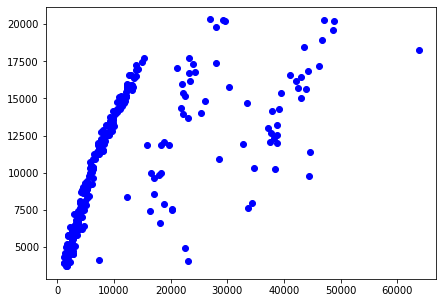

In [12]:
#tf.squeeze(y_preds) == y_test 
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_preds, c="b")

In [13]:
#Build a neural networks 
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, input_shape=[11]),
    tf.keras.layers.Dense(1, input_shape= [1])
])

model_2.compile(
               loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(lr=0.1),
               metrics = ["mae"])

history = model_2.fit(x_train , y_train , epochs=150 , verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/150
34/34 [==============================] - 0s 3ms/step - loss: 9854.2568 - mae: 9854.2568
Epoch 2/150
34/34 [==============================] - 0s 3ms/step - loss: 7379.2383 - mae: 7379.2383
Epoch 3/150
34/34 [==============================] - 0s 3ms/step - loss: 7042.1650 - mae: 7042.1650
Epoch 4/150
34/34 [==============================] - 0s 4ms/step - loss: 6625.2217 - mae: 6625.2217
Epoch 5/150
34/34 [==============================] - 0s 3ms/step - loss: 6359.2090 - mae: 6359.2090
Epoch 6/150
34/34 [==============================] - 0s 3ms/step - loss: 6116.6499 - mae: 6116.6499
Epoch 7/150
34/34 [==============================] - 0s 3ms/step - loss: 5846.0171 - mae: 5846.0171
Epoch 8/150
34/34 [==============================] - 0s 3ms/step - loss: 5618.7061 - mae: 5618.7061
Epoch 9/150
34/34 [==============================] - 0s 4ms/step - loss: 5131.1602 - mae: 5131.1602
Epoch 10/150
34/34 [==============================] - 0s 4ms/step - loss: 4640.8779 - mae: 4640.8779

In [14]:
y_preds = model_2.predict([x_test])
y_preds

array([[ 9300.691  ],
       [ 5910.3643 ],
       [44213.383  ],
       [ 9260.615  ],
       [32070.498  ],
       [ 5704.12   ],
       [ 1064.5734 ],
       [13291.625  ],
       [ 3582.2725 ],
       [10186.602  ],
       [35687.543  ],
       [ 7715.6743 ],
       [ 4160.5967 ],
       [40686.902  ],
       [43060.832  ],
       [40375.574  ],
       [10475.791  ],
       [40250.945  ],
       [ 8610.979  ],
       [38632.684  ],
       [ 4193.828  ],
       [ 8073.5806 ],
       [  743.4539 ],
       [ 2972.0493 ],
       [10831.791  ],
       [11164.487  ],
       [12248.919  ],
       [ 4819.276  ],
       [ 9894.482  ],
       [  429.0498 ],
       [ 8392.456  ],
       [11569.964  ],
       [ 1837.4292 ],
       [ 5159.688  ],
       [ 3014.2073 ],
       [ 8679.874  ],
       [ 1932.4559 ],
       [ 7931.9014 ],
       [41331.98   ],
       [36860.848  ],
       [ 3209.171  ],
       [ 2271.6904 ],
       [11644.539  ],
       [11418.845  ],
       [ 5516.5215 ],
       [11

9/9 [==============================] - 0s 3ms/step - loss: 3155.0054 - mae: 3155.0054


[3155.00537109375, 3155.00537109375]

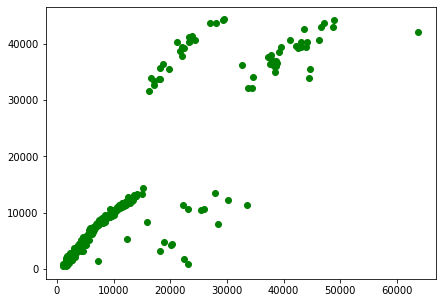

In [15]:
#tf.squeeze(y_preds) == y_test 
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_preds, c="g")
model_2.evaluate(x_test, y_test)

Text(0.5, 0, 'epochs')

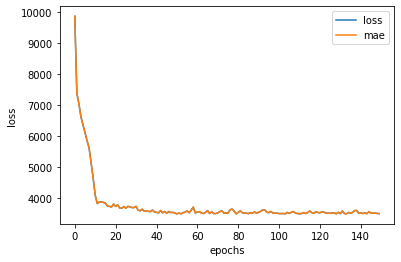

In [16]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#Preprocessing the data

##Normalizing and standardizing

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [18]:
insurance = pd.read_csv("http://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing  import MinMaxScaler, OneHotEncoder

#Create a column transformer 
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi" ,"children" ]),# turn all value in the these column between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex" , "smoker", "region"])
)

#create x and y 
x= insurance.drop("charges", axis=1)
y= insurance["charges"]


#Splitting the data
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

#Fit the column transform to our trainning data
ct.fit(x_train)

#Transform training and test data with normalizing th e(minmaxScaler) and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


In [23]:
#What does our data look like now
x_train_normal, x_train , x_test_normal ,x_test

(array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
         1.        ],
        [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
         1.        ]]),       age     sex     bmi  children smoker     region
 560    46  female  19.950         2     no  northwest
 1285   47  female  24.320         0     no  northeast
 1142   52  female  24.860         0     no  southeast
 969    39  female  34.320         5     no  southeast
 486    54  female  21.470         3     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1095   18  female  31.35

In [26]:
tf.random.set_seed(42)

#Created the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, input_shape=[11]),
    tf.keras.layers.Dense(1, input_shape= [1])
])
#Compile the model
model_3.compile(
               loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(lr=0.1),
               metrics = ["mae"])
#Fit the data in the model
model_3.fit(x_train_normal, y_train , epochs=100 ,verbose=1 )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 12826.1123 - mae: 12826.1123
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 9587.7393 - mae: 9587.7393
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 7758.3013 - mae: 7758.3013
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7299.1445 - mae: 7299.1445
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 6699.3433 - mae: 6699.3433
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 5928.4707 - mae: 5928.4707
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 4947.6045 - mae: 4947.6045
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 4114.4844 - mae: 4114.4844
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 3745.8372 - mae: 3745.8372
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 3692.3438 - mae: 3692.34

In [29]:
#Evaluate the model
model_3.evaluate(x_test_normal , y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3182.1802 - mae: 3182.1802


[3182.18017578125, 3182.18017578125]